# I. Import the required libraries

In [1]:
##Python

import os
import random
import sys


os library: 
- This module provides a portable way of using operating system dependent functionality
- If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module

sys library:
- This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.

In [2]:
## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

Using TensorFlow backend.


**glob package:**
- Find all the pathnames matching a specified pattern according to the rules

**keras:**
- an API designed for humans beings
- consistent, simple API
- deep learning framework

**IPython.display as ipd**
- Play audio file

**librosa:**
- Python package for music and audio
- Use librosa.load to load an audio file into an audio array
- Plot the audio array using librosa.display.waveplot (plot the audio)


**import plotly.graph_objs as go/ import plotly.offline as py/ import plotly.tools as tls**

- different way to plot

**seaborn**
- create better plotting

**scipy.io.wavfile**
- deal with wavefile

**tensorflow**
- TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.


In [3]:
## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


In [4]:
## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm


In [6]:
input_duration=3
# % pylab inline

# II. Reading the data

In [7]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('data/')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [8]:
#create dataframe for data intel

data_df = pd.DataFrame(columns = ['path', 'source', 'actor', 
'gender', 'intensity', 'statement', 'repetition', 'emotion'])

row = 0

for i in dir_list:
    file_list = os.listdir('data/' + i)
    for f in file_list:
        #split '03-01-08-02-02-01-01.wav' 
        #to 03-01-08-02-02-01-01 
        #0 - audio-only, 1- speech,2-emotion,3- intensity,
        #4- statement, 
        #5 - repetition #6- actor
        #--> ['03', '01', '08', '02', '02', '01', '01']
        nm = f.split('.')[0].split('-')
        
        path = 'data/' + i + '/' + f
        
        #take out properties
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        #check gender
        if int(actor) % 2 == 0:
            gender = 'female'
        else:
            gender = 'male'
        
        #intensity - 01 normal - 02 strond
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        #statement
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        #repetition
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
        
        
        data_df.loc[row] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        row += 1
        
        




line 9:
- os.listdir: 
    - Python method listdir() returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order. It does not include the special entries '.' and '..' even if they are present in the directory.

In [9]:
print(len(data_df))
data_df.head()

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,data/Actor_01/03-01-08-02-02-01-01.wav,1,1,male,1,1,0,8
1,data/Actor_01/03-01-08-01-01-01-01.wav,1,1,male,0,0,0,8
2,data/Actor_01/03-01-05-01-02-01-01.wav,1,1,male,0,1,0,5
3,data/Actor_01/03-01-06-01-02-02-01.wav,1,1,male,0,1,1,6
4,data/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6


# III.Plotting the audio file's waveform and its spectrogram

In [10]:
#pick a random file
filename = data_df.path[1]
print(filename)

#sample - audio
#sample_rate - rate of the sample, assign automatically
samples, sample_rate = librosa.load(filename)
print(samples, sample_rate)



data/Actor_01/03-01-08-01-01-01-01.wav
[0. 0. 0. ... 0. 0. 0.] 22050


In [11]:
len(samples), sample_rate

(75045, 22050)

In [12]:
sample_rate/ len(samples)

0.2938237057765341

**signal.spectrogram**

input:
- Compute the spectrogram with consecutive (fourier transforms) - quang pho hong ngoai bien doi
- fs = sampling frequency of the x time series
- window = desired window to use
- nperseg: length of each segment
- noverlap: number of points to overlap between segments
- detrend : If detrend is False, no detrending is done


output:
- f: array of sample frequencies
- t: array of segment times
- Sxx: Spectrogram of x



In [13]:
#create the specgram
#input the sample & sample rate
#mainly this function to plot beautiful 
#calculate the frequency and segment times
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
#     print(spec.T.astype(np.float32) + eps)
#     print(spec.T.astype(np.float32))
          
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)


Text(0.5, 0, 'Seconds')

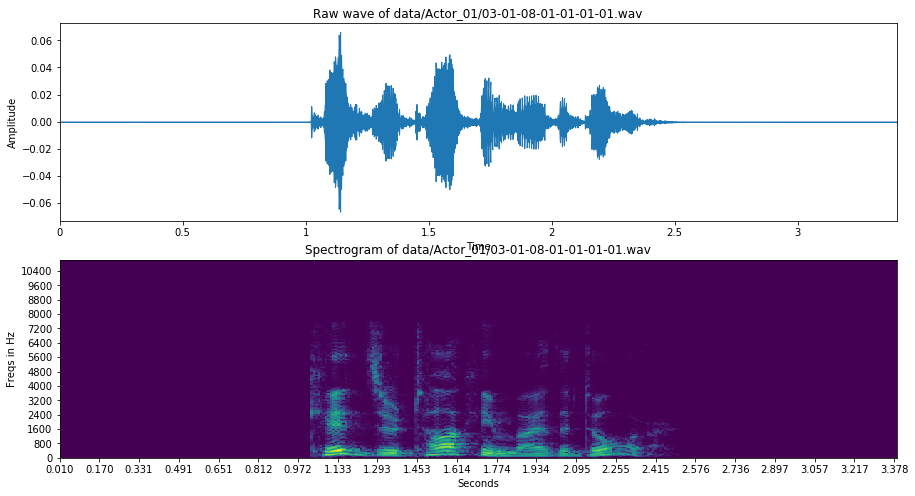

In [14]:
#plot Wave Form and Spectrogram

freqs, times,spectrogram = log_specgram(samples, sample_rate)

#raw wave of wave file

                        #length, width
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [15]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [16]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-2.2397376e-07,  4.2738393e-06, -3.7584330e-06, ...,
         9.1986707e-04,  1.0353746e-03,  1.0460848e-03], dtype=float32),
 array([22016, 53248]))

Compute a mel-scaled spectrogram.

If a spectrogram input S is provided, then it is mapped directly onto the mel basis mel_f by mel_f.dot(S).

If a time-series input y, sr is provided, then its magnitude spectrogram S is first computed, and then mapped onto the mel scale by mel_f.dot$(S**power)$. By default, power=2 operates on a power spectrum.

https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

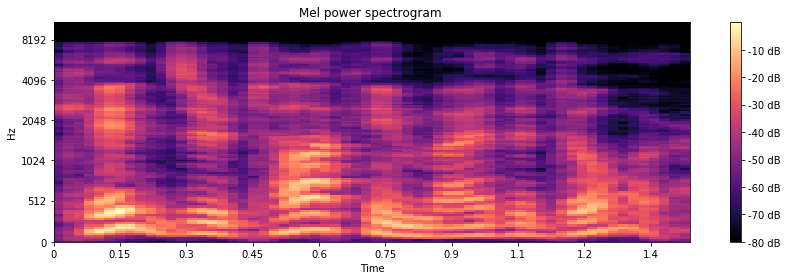

In [17]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


librosa.feature.mfcc : Mel-frequency cepstral coefficients (MFCCs)

- The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.



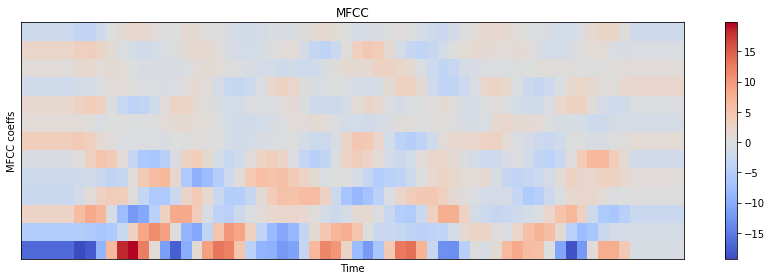

In [18]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [19]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [20]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [21]:
# Silence trimmed Sound by manuel trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

# IV. Defining the truth label

In [22]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)
print(label2_list[4])

male_negative


In [23]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [24]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [25]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

- label2_list: 2 classes: positive & negative
- label3_list: 3 classes: positive, neutral & negative
- label5_list: 5 classes: angry, calm, sad, happy & fearful
- label8_list: all clases:angry, calm, sad, fearful, disgust, surprise

In [26]:
# Select the label set you want by commenting the unwanteds.

data_df['label'] = label2_list
# data_df['label'] = label3_list
# data_df['label'] = label5_list
# data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,data/Actor_01/03-01-08-02-02-01-01.wav,1,1,male,1,1,0,8,male_none
1,data/Actor_01/03-01-08-01-01-01-01.wav,1,1,male,0,0,0,8,male_none
2,data/Actor_01/03-01-05-01-02-01-01.wav,1,1,male,0,1,0,5,male_negative
3,data/Actor_01/03-01-06-01-02-02-01.wav,1,1,male,0,1,1,6,male_negative
4,data/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6,male_negative


In [27]:
print (data_df.label.value_counts())

male_negative      288
female_negative    288
male_none          240
female_none        240
female_positive    192
male_positive      192
Name: label, dtype: int64


In [28]:
print (data_df.label.value_counts().keys())

Index(['male_negative', 'female_negative', 'male_none', 'female_none',
       'female_positive', 'male_positive'],
      dtype='object')


In [29]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

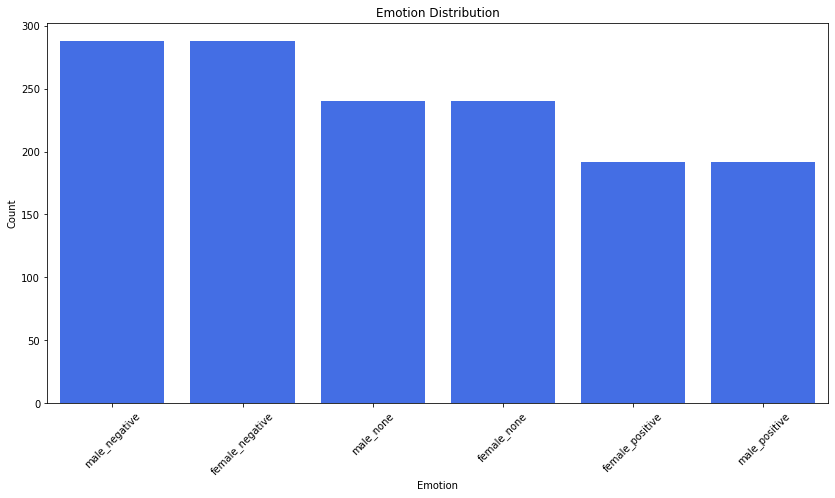

In [30]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

# V.Data Splitting


In [31]:
# # Female Data Set

# ## Uncomment all below to use Female set 

# data2_df = data_df.copy()
# data2_df = data2_df[data2_df.label != "male_none"]
# data2_df = data2_df[data2_df.label != "female_none"]
# data2_df = data2_df[data2_df.label != "male_happy"]
# data2_df = data2_df[data2_df.label != "male_angry"]
# data2_df = data2_df[data2_df.label != "male_sad"]
# data2_df = data2_df[data2_df.label != "male_fearful"]
# data2_df = data2_df[data2_df.label != "male_calm"]
# data2_df = data2_df[data2_df.label != "male_positive"]
# data2_df = data2_df[data2_df.label != "male_negative"].reset_index(drop=True)
# tmp1 = data2_df[data2_df.actor == 22]
# tmp2 = data2_df[data2_df.actor == 24]
# data3_df = pd.concat([tmp1, tmp2],ignore_index=True).reset_index(drop=True)
# data2_df = data2_df[data2_df.actor != 22]
# data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
# print (len(data2_df))
# data2_df.head()

In [32]:
# data2_df

data.concat:
    
- Concatenate pandas objects along a particular axis with optional set logic along the other axes.

- Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

In [33]:
# data2_df.actor.unique()

In [34]:
# data2_df.actor == 20

In [35]:
# Male Data Set

## Uncomment all below to use Male set 

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head()

400


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,data/Actor_01/03-01-05-01-02-01-01.wav,1,1,male,0,1,0,5,male_negative
1,data/Actor_01/03-01-06-01-02-02-01.wav,1,1,male,0,1,1,6,male_negative
2,data/Actor_01/03-01-06-02-01-02-01.wav,1,1,male,1,0,1,6,male_negative
3,data/Actor_01/03-01-05-02-01-01-01.wav,1,1,male,1,0,0,5,male_negative
4,data/Actor_01/03-01-04-01-01-02-01.wav,1,1,male,0,0,1,4,male_negative


In [36]:
print (len(data3_df))
data3_df.head()

80


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,data/Actor_21/03-01-06-01-01-02-21.wav,1,21,male,0,0,1,6,male_negative
1,data/Actor_21/03-01-05-01-01-01-21.wav,1,21,male,0,0,0,5,male_negative
2,data/Actor_21/03-01-05-02-02-01-21.wav,1,21,male,1,1,0,5,male_negative
3,data/Actor_21/03-01-06-02-02-02-21.wav,1,21,male,1,1,1,6,male_negative
4,data/Actor_21/03-01-04-01-02-02-21.wav,1,21,male,0,1,1,4,male_negative


# VI. Getting the features of audio files using librosa

In [37]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 400/400 [00:13<00:00, 28.81it/s]


- tqdm (means - progess)
    - In addition to its low overhead, tqdm uses smart algorithms to predict the remaining time and to skip unnecessary iteration displays, which allows for a negligible overhead in most cases.
    - Print the progress of the machine
- **librosa:**
    - Python package for music and audio
    - Use librosa.load to load an audio file into an audio array
    - Plot the audio array using librosa.display.waveplot (plot the audio)  

- data.loc[]
    - takes only index labels and returns row or dataframe 

In [38]:
data.head()

,feature
0,"[-55.725975, -56.17095, -56.099735, -54.802708..."
1,"[-63.524635, -63.524635, -63.524635, -63.52463..."
2,"[-43.072586, -44.302555, -44.097378, -44.23784..."
3,"[-42.992447, -42.992447, -42.871517, -42.28898..."
4,"[-67.73681, -67.73681, -67.68451, -67.14076, -..."


In [39]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [40]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-55.725975,-56.170952,-56.099735,-54.802708,-55.267311,-56.157734,-56.157734,-56.157734,-56.157734,-56.157734,...,-56.157734,-56.157734,-56.157734,-56.157734,-55.868015,-55.230442,-56.157734,-56.157734,-54.916111,-55.475685
1,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-61.551125,-63.393326,-63.524635,-63.524635,...,-63.751469,-63.666870,-63.106632,-63.281757,-63.524635,-63.524635,-63.524635,-62.267818,-61.956791,-63.524635
2,-43.072586,-44.302555,-44.097378,-44.237846,-44.318237,-44.431492,-44.208611,-44.297836,-43.697380,-43.614746,...,-40.222435,-40.843681,-38.703667,-38.246449,-39.181229,-41.137184,-39.812675,-41.494083,-43.511288,-43.249752
3,-42.992447,-42.992447,-42.871517,-42.288982,-40.687477,-40.202488,-40.153965,-42.670231,-41.760715,-41.448723,...,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447
4,-67.736809,-67.736809,-67.684509,-67.140762,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,...,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809


In [41]:
newdf = pd.concat([df3,labels], axis=1)

data.concat:
    
- Concatenate pandas objects along a particular axis with optional set logic along the other axes.

- Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

In [42]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

400

In [43]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-55.725975,-56.170952,-56.099735,-54.802708,-55.267311,-56.157734,-56.157734,-56.157734,-56.157734,-56.157734,...,-56.157734,-56.157734,-56.157734,-55.868015,-55.230442,-56.157734,-56.157734,-54.916111,-55.475685,male_negative
1,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-61.551125,-63.393326,-63.524635,-63.524635,...,-63.666870,-63.106632,-63.281757,-63.524635,-63.524635,-63.524635,-62.267818,-61.956791,-63.524635,male_negative
2,-43.072586,-44.302555,-44.097378,-44.237846,-44.318237,-44.431492,-44.208611,-44.297836,-43.697380,-43.614746,...,-40.843681,-38.703667,-38.246449,-39.181229,-41.137184,-39.812675,-41.494083,-43.511288,-43.249752,male_negative
3,-42.992447,-42.992447,-42.871517,-42.288982,-40.687477,-40.202488,-40.153965,-42.670231,-41.760715,-41.448723,...,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,male_negative
4,-67.736809,-67.736809,-67.684509,-67.140762,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,...,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,male_negative
5,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,...,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,male_negative
6,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,...,-56.043785,-55.150391,-54.902103,-53.648090,-55.143600,-57.416245,-57.416245,-57.029701,-55.431744,male_positive
7,-60.574203,-60.223942,-60.949566,-60.959080,-60.982517,-60.982449,-60.982449,-60.982449,-60.982449,-60.360420,...,-60.982449,-60.982449,-60.982449,-60.982449,-60.982449,-60.982449,NaN,NaN,NaN,male_positive
8,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,...,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,male_positive
9,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,...,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,male_positive


In [44]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-55.725975,-56.170952,-56.099735,-54.802708,-55.267311,-56.157734,-56.157734,-56.157734,-56.157734,-56.157734,...,-56.157734,-56.157734,-56.157734,-55.868015,-55.230442,-56.157734,-56.157734,-54.916111,-55.475685,male_negative
1,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-61.551125,-63.393326,-63.524635,-63.524635,...,-63.666870,-63.106632,-63.281757,-63.524635,-63.524635,-63.524635,-62.267818,-61.956791,-63.524635,male_negative
2,-43.072586,-44.302555,-44.097378,-44.237846,-44.318237,-44.431492,-44.208611,-44.297836,-43.697380,-43.614746,...,-40.843681,-38.703667,-38.246449,-39.181229,-41.137184,-39.812675,-41.494083,-43.511288,-43.249752,male_negative
3,-42.992447,-42.992447,-42.871517,-42.288982,-40.687477,-40.202488,-40.153965,-42.670231,-41.760715,-41.448723,...,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,male_negative
4,-67.736809,-67.736809,-67.684509,-67.140762,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,...,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,male_negative
5,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,...,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,-61.561672,male_negative
6,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,-57.416245,...,-56.043785,-55.150391,-54.902103,-53.648090,-55.143600,-57.416245,-57.416245,-57.029701,-55.431744,male_positive
7,-60.574203,-60.223942,-60.949566,-60.959080,-60.982517,-60.982449,-60.982449,-60.982449,-60.982449,-60.360420,...,-60.982449,-60.982449,-60.982449,-60.982449,-60.982449,-60.982449,NaN,NaN,NaN,male_positive
8,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,...,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,-73.841805,male_positive
9,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,...,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,-69.693993,male_positive


In [45]:
rnewdf.isnull().sum().sum()

2284

- rnewdf.isnull().sum().sum()
-> to count the NaN values in a column in pandas

In [46]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-55.725975,-56.170952,-56.099735,-54.802708,-55.267311,-56.157734,-56.157734,-56.157734,-56.157734,-56.157734,...,-56.157734,-56.157734,-56.157734,-55.868015,-55.230442,-56.157734,-56.157734,-54.916111,-55.475685,male_negative
1,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-61.551125,-63.393326,-63.524635,-63.524635,...,-63.666870,-63.106632,-63.281757,-63.524635,-63.524635,-63.524635,-62.267818,-61.956791,-63.524635,male_negative
2,-43.072586,-44.302555,-44.097378,-44.237846,-44.318237,-44.431492,-44.208611,-44.297836,-43.697380,-43.614746,...,-40.843681,-38.703667,-38.246449,-39.181229,-41.137184,-39.812675,-41.494083,-43.511288,-43.249752,male_negative
3,-42.992447,-42.992447,-42.871517,-42.288982,-40.687477,-40.202488,-40.153965,-42.670231,-41.760715,-41.448723,...,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,male_negative
4,-67.736809,-67.736809,-67.684509,-67.140762,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,...,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,male_negative


fill the NaN value by 0

# VII. Data Augmentation/Data advanced

In [47]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data




librosa.effects.pitch_shift
- shift the pitch of a waveform by n_steps semitones

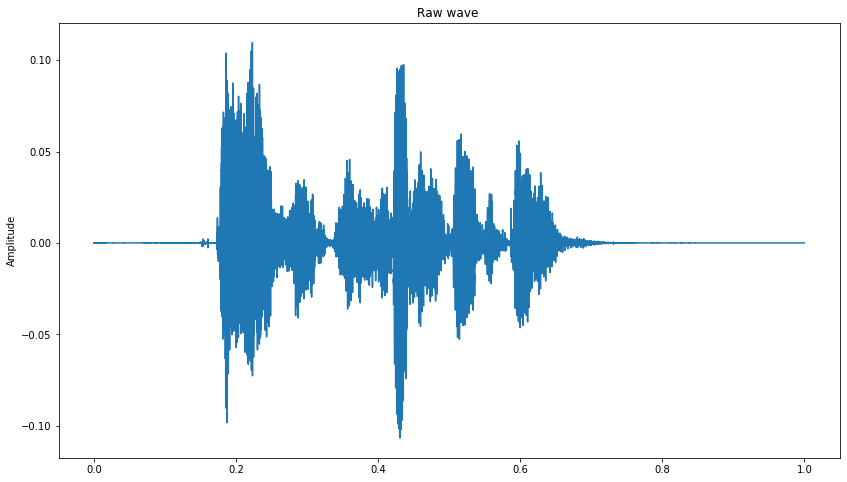

In [48]:
X, sample_rate = librosa.load(data2_df.path[0], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

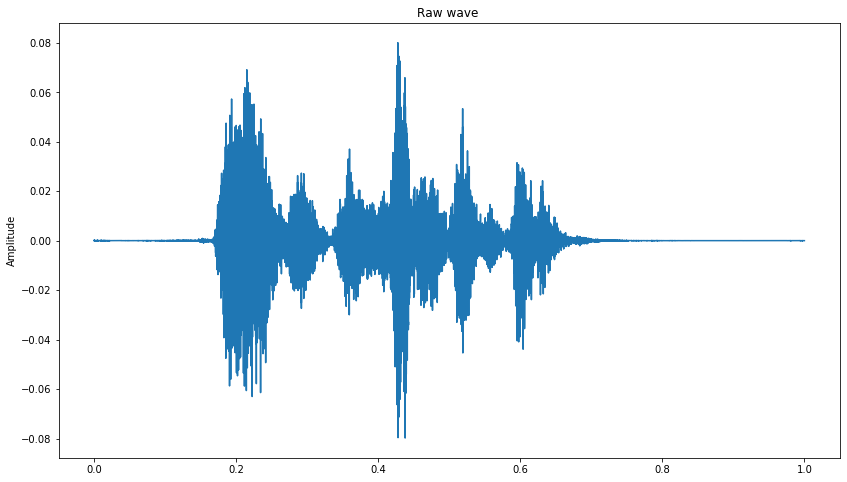

In [49]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [50]:
# Augmentation Method 1
#using noise at line 8
syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]
        

100%|██████████| 400/400 [00:15<00:00, 25.84it/s]


In [51]:
# Augmentation Method 2
#using pitch at line 8
syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data2_df.label[i]]
        

100%|██████████| 400/400 [01:08<00:00,  5.85it/s]


In [52]:
len(syn_data1), len(syn_data2) 

(400, 400)

In [53]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [54]:
#using syn_data1
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

400

In [55]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-53.585938,-54.953671,-53.522789,-51.921532,-52.267414,-51.883396,-50.122295,-51.487221,-52.314224,-53.066448,...,-53.180138,-53.947041,-52.353638,-52.583820,-52.063152,-53.454082,-50.874943,-50.290928,-50.965919,male_negative
1,-62.911156,-63.389141,-63.474281,-61.432182,-61.311966,-62.774189,-60.694092,-61.400352,-62.857742,-62.740154,...,-62.027870,-61.730820,-60.768452,-60.936142,-61.879944,-62.959332,-61.473442,-60.367954,-62.752525,male_negative
2,-37.683495,-36.278927,-36.787266,-35.299191,-36.841915,-37.020920,-36.334396,-37.204544,-35.841114,-34.756741,...,-37.595482,-36.181519,-36.566956,-33.445705,-33.057640,-35.159184,-37.088310,-38.717804,-38.124245,male_negative
3,-37.957043,-36.746868,-36.747467,-35.522743,-33.812649,-34.366066,-35.912590,-36.764809,-36.273544,-36.180813,...,-35.070858,-34.806885,-32.881462,-35.165401,-36.882725,-36.360775,-35.485443,-35.619915,-35.449177,male_negative
4,-56.594742,-54.762497,-54.709202,-58.269932,-60.487679,-58.719364,-56.626347,-56.543423,-56.331238,-56.789425,...,-59.599102,-58.624306,-55.738770,-54.339455,-53.745770,-56.457668,-57.890339,-57.821163,-54.717197,male_negative


In [56]:
#using syn_data2
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

400

In [57]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-57.787300,-59.652763,-58.843460,-57.840328,-59.699814,-60.275452,-60.281197,-60.281197,-60.281197,-60.281197,...,-60.281197,-60.281197,-60.281197,-60.120277,-60.068008,-59.996868,-60.097965,-59.868904,-59.783611,male_negative
1,-65.128670,-65.128670,-65.128670,-65.128670,-65.128670,-64.760017,-63.266056,-64.568230,-65.128670,-65.128670,...,-65.207451,-65.051666,-64.964676,-65.128670,-65.128670,-65.128670,-65.041870,-64.442947,-64.261772,male_negative
2,-43.512478,-46.235672,-47.925533,-47.462471,-47.414120,-47.272305,-47.329990,-47.533096,-47.380306,-47.975327,...,-44.830051,-44.215927,-42.545322,-42.450447,-43.997818,-44.615437,-44.001499,-46.823074,-47.336445,male_negative
3,-43.335087,-43.551250,-44.409237,-44.508354,-43.893841,-42.988426,-43.100071,-43.251579,-42.542255,-42.408421,...,-43.335087,-43.335087,-43.335087,-43.335087,-43.335087,-43.335087,-43.335087,-43.335087,-43.335087,male_negative
4,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,...,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,-68.623604,male_negative


In [58]:
# Combining the Augmented data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-55.725975,-56.170952,-56.099735,-54.802708,-55.267311,-56.157734,-56.157734,-56.157734,-56.157734,-56.157734,...,-56.157734,-56.157734,-56.157734,-55.868015,-55.230442,-56.157734,-56.157734,-54.916111,-55.475685,male_negative
1,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-63.524635,-61.551125,-63.393326,-63.524635,-63.524635,...,-63.666870,-63.106632,-63.281757,-63.524635,-63.524635,-63.524635,-62.267818,-61.956791,-63.524635,male_negative
2,-43.072586,-44.302555,-44.097378,-44.237846,-44.318237,-44.431492,-44.208611,-44.297836,-43.697380,-43.614746,...,-40.843681,-38.703667,-38.246449,-39.181229,-41.137184,-39.812675,-41.494083,-43.511288,-43.249752,male_negative
3,-42.992447,-42.992447,-42.871517,-42.288982,-40.687477,-40.202488,-40.153965,-42.670231,-41.760715,-41.448723,...,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,-42.992447,male_negative
4,-67.736809,-67.736809,-67.684509,-67.140762,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,...,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,-67.736809,male_negative


In [59]:
#  Stratified Shuffle Split

X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [60]:
y_train.value_counts()

male_negative    576
male_positive    384
Name: label, dtype: int64

In [61]:
y_test.value_counts()

male_negative    144
male_positive     96
Name: label, dtype: int64

In [62]:
X_train.isna().sum().sum()

0

In [63]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [64]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [65]:
X_train

array([[-45.41357422, -46.18031693, -46.96893692, ..., -45.44899368,
        -44.15039825, -44.4185524 ],
       [-71.18871307, -71.18871307, -71.18871307, ..., -62.83276749,
        -60.3532486 , -60.48559952],
       [-54.66705322, -53.57662582, -54.85690689, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-41.96409225, -41.26110458, -38.77020264, ..., -36.27941132,
        -37.40420151, -39.46936035],
       [-36.68465805, -36.86893082, -37.54866028, ..., -24.58025742,
        -22.11043358, -17.04046059],
       [-50.40372849, -49.10998917, -48.69072723, ..., -49.38362122,
        -50.22312546, -50.12893295]])

# VIII. Changing dimension for CNN model

In [66]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [71]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
#     if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
#         return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [72]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)


In [73]:
# Plotting Model Summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 259, 256)          2304      
_________________________________________________________________
activation_10 (Activation)   (None, 259, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 259, 256)          524544    
_________________________________________________________________
batch_normalization_3 (Batch (None, 259, 256)          1024      
_________________________________________________________________
activation_11 (Activation)   (None, 259, 256)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 259, 256)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 256)          

In [74]:
# Compile your model
# tf.compat.v1.disable_eager_execution()
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy', fscore])

# IX. Removed the whole training part for avoiding unnecessary long epochs list

In [75]:
# Model Training
tf.executing_eagerly()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,
                     validation_data=(x_testcnn, y_test), 
                     callbacks=[mcp_save, lr_reduce])

Train on 960 samples, validate on 240 samples
Epoch 1/700
960/960 [==============================] - 8s 8ms/step - loss: 0.6629 - accuracy: 0.5906 - fscore: 0.5906 - val_loss: 0.6929 - val_accuracy: 0.5292 - val_fscore: 0.5292
Epoch 2/700
960/960 [==============================] - 7s 8ms/step - loss: 0.6355 - accuracy: 0.6229 - fscore: 0.6229 - val_loss: 0.6850 - val_accuracy: 0.5417 - val_fscore: 0.5417
Epoch 3/700
960/960 [==============================] - 7s 8ms/step - loss: 0.6322 - accuracy: 0.6313 - fscore: 0.6312 - val_loss: 0.6698 - val_accuracy: 0.6167 - val_fscore: 0.6167
Epoch 4/700
960/960 [==============================] - 8s 8ms/step - loss: 0.6184 - accuracy: 0.6615 - fscore: 0.6615 - val_loss: 0.6560 - val_accuracy: 0.6625 - val_fscore: 0.6625
Epoch 5/700
960/960 [==============================] - 7s 8ms/step - loss: 0.6059 - accuracy: 0.6719 - fscore: 0.6719 - val_loss: 0.6348 - val_accuracy: 0.6958 - val_fscore: 0.6958
Epoch 6/700
960/960 [============================

Epoch 46/700
960/960 [==============================] - 8s 8ms/step - loss: 0.5054 - accuracy: 0.7594 - fscore: 0.7594 - val_loss: 0.5517 - val_accuracy: 0.7417 - val_fscore: 0.7417
Epoch 47/700
960/960 [==============================] - 8s 8ms/step - loss: 0.4954 - accuracy: 0.7771 - fscore: 0.7771 - val_loss: 0.5634 - val_accuracy: 0.7542 - val_fscore: 0.7542
Epoch 48/700
960/960 [==============================] - 8s 8ms/step - loss: 0.5024 - accuracy: 0.7531 - fscore: 0.7531 - val_loss: 0.5538 - val_accuracy: 0.7500 - val_fscore: 0.7500
Epoch 49/700
960/960 [==============================] - 8s 8ms/step - loss: 0.4997 - accuracy: 0.7615 - fscore: 0.7615 - val_loss: 0.5688 - val_accuracy: 0.7500 - val_fscore: 0.7500
Epoch 50/700
960/960 [==============================] - 8s 8ms/step - loss: 0.4977 - accuracy: 0.7635 - fscore: 0.7635 - val_loss: 0.5654 - val_accuracy: 0.7542 - val_fscore: 0.7542
Epoch 51/700
960/960 [==============================] - 8s 8ms/step - loss: 0.4921 - accur

960/960 [==============================] - 7s 7ms/step - loss: 0.4122 - accuracy: 0.8323 - fscore: 0.8323 - val_loss: 0.5384 - val_accuracy: 0.7917 - val_fscore: 0.7917
Epoch 92/700
960/960 [==============================] - 7s 7ms/step - loss: 0.4132 - accuracy: 0.8281 - fscore: 0.8281 - val_loss: 0.5154 - val_accuracy: 0.8083 - val_fscore: 0.8083
Epoch 93/700
960/960 [==============================] - 7s 7ms/step - loss: 0.4148 - accuracy: 0.8354 - fscore: 0.8354 - val_loss: 0.5203 - val_accuracy: 0.8083 - val_fscore: 0.8083
Epoch 94/700
960/960 [==============================] - 7s 7ms/step - loss: 0.4174 - accuracy: 0.8344 - fscore: 0.8344 - val_loss: 0.5185 - val_accuracy: 0.8250 - val_fscore: 0.8250
Epoch 95/700
960/960 [==============================] - 7s 7ms/step - loss: 0.4067 - accuracy: 0.8375 - fscore: 0.8375 - val_loss: 0.5677 - val_accuracy: 0.6875 - val_fscore: 0.6875
Epoch 96/700
960/960 [==============================] - 7s 8ms/step - loss: 0.4099 - accuracy: 0.8271 -

Epoch 136/700
960/960 [==============================] - 7s 8ms/step - loss: 0.3203 - accuracy: 0.8948 - fscore: 0.8948 - val_loss: 0.4939 - val_accuracy: 0.7625 - val_fscore: 0.7625
Epoch 137/700
960/960 [==============================] - 8s 8ms/step - loss: 0.3227 - accuracy: 0.8823 - fscore: 0.8823 - val_loss: 0.5025 - val_accuracy: 0.7542 - val_fscore: 0.7542
Epoch 138/700
960/960 [==============================] - 7s 8ms/step - loss: 0.3155 - accuracy: 0.8906 - fscore: 0.8906 - val_loss: 0.4634 - val_accuracy: 0.8625 - val_fscore: 0.8625
Epoch 139/700
960/960 [==============================] - 7s 8ms/step - loss: 0.3242 - accuracy: 0.8885 - fscore: 0.8885 - val_loss: 0.4616 - val_accuracy: 0.8625 - val_fscore: 0.8625
Epoch 140/700
960/960 [==============================] - 7s 8ms/step - loss: 0.3085 - accuracy: 0.9031 - fscore: 0.9031 - val_loss: 0.4926 - val_accuracy: 0.7708 - val_fscore: 0.7708
Epoch 141/700
960/960 [==============================] - 7s 8ms/step - loss: 0.3123 -

Epoch 181/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2262 - accuracy: 0.9417 - fscore: 0.9417 - val_loss: 0.4063 - val_accuracy: 0.8542 - val_fscore: 0.8542
Epoch 182/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2276 - accuracy: 0.9344 - fscore: 0.9344 - val_loss: 0.3813 - val_accuracy: 0.8875 - val_fscore: 0.8875
Epoch 183/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2271 - accuracy: 0.9406 - fscore: 0.9406 - val_loss: 0.3724 - val_accuracy: 0.9042 - val_fscore: 0.9042
Epoch 184/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2260 - accuracy: 0.9354 - fscore: 0.9354 - val_loss: 0.3728 - val_accuracy: 0.9125 - val_fscore: 0.9125
Epoch 185/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2340 - accuracy: 0.9396 - fscore: 0.9396 - val_loss: 0.4137 - val_accuracy: 0.8333 - val_fscore: 0.8333
Epoch 186/700
960/960 [==============================] - 8s 8ms/step - loss: 0.2271 -

Epoch 226/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1548 - accuracy: 0.9594 - fscore: 0.9594 - val_loss: 0.5044 - val_accuracy: 0.7083 - val_fscore: 0.7083
Epoch 227/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1663 - accuracy: 0.9563 - fscore: 0.9563 - val_loss: 0.3301 - val_accuracy: 0.9042 - val_fscore: 0.9042
Epoch 228/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1612 - accuracy: 0.9615 - fscore: 0.9615 - val_loss: 0.3146 - val_accuracy: 0.8792 - val_fscore: 0.8792
Epoch 229/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1603 - accuracy: 0.9573 - fscore: 0.9573 - val_loss: 0.3383 - val_accuracy: 0.9000 - val_fscore: 0.9000
Epoch 230/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1660 - accuracy: 0.9573 - fscore: 0.9573 - val_loss: 0.3226 - val_accuracy: 0.9167 - val_fscore: 0.9167
Epoch 231/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1570 -

Epoch 271/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1098 - accuracy: 0.9823 - fscore: 0.9823 - val_loss: 0.2574 - val_accuracy: 0.9292 - val_fscore: 0.9292
Epoch 272/700
960/960 [==============================] - 7s 8ms/step - loss: 0.1214 - accuracy: 0.9750 - fscore: 0.9750 - val_loss: 0.2540 - val_accuracy: 0.9375 - val_fscore: 0.9375
Epoch 273/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1270 - accuracy: 0.9740 - fscore: 0.9740 - val_loss: 0.5983 - val_accuracy: 0.6542 - val_fscore: 0.6542
Epoch 274/700
960/960 [==============================] - 8s 8ms/step - loss: 0.1137 - accuracy: 0.9802 - fscore: 0.9802 - val_loss: 0.4730 - val_accuracy: 0.7292 - val_fscore: 0.7292
Epoch 275/700
960/960 [==============================] - 7s 8ms/step - loss: 0.1173 - accuracy: 0.9760 - fscore: 0.9760 - val_loss: 0.2702 - val_accuracy: 0.9250 - val_fscore: 0.9250
Epoch 276/700
960/960 [==============================] - 7s 8ms/step - loss: 0.1045 -

Epoch 316/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0930 - accuracy: 0.9844 - fscore: 0.9844 - val_loss: 0.2303 - val_accuracy: 0.9333 - val_fscore: 0.9333
Epoch 317/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0781 - accuracy: 0.9896 - fscore: 0.9896 - val_loss: 0.1967 - val_accuracy: 0.9625 - val_fscore: 0.9625
Epoch 318/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0868 - accuracy: 0.9771 - fscore: 0.9771 - val_loss: 0.5004 - val_accuracy: 0.7000 - val_fscore: 0.7000
Epoch 319/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0861 - accuracy: 0.9823 - fscore: 0.9823 - val_loss: 0.2627 - val_accuracy: 0.9083 - val_fscore: 0.9083
Epoch 320/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0773 - accuracy: 0.9865 - fscore: 0.9865 - val_loss: 0.3365 - val_accuracy: 0.8542 - val_fscore: 0.8542
Epoch 321/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0818 -

Epoch 361/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0657 - accuracy: 0.9875 - fscore: 0.9875 - val_loss: 0.2069 - val_accuracy: 0.9417 - val_fscore: 0.9417
Epoch 362/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0587 - accuracy: 0.9927 - fscore: 0.9927 - val_loss: 0.3329 - val_accuracy: 0.8542 - val_fscore: 0.8542
Epoch 363/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0601 - accuracy: 0.9885 - fscore: 0.9885 - val_loss: 0.1989 - val_accuracy: 0.9417 - val_fscore: 0.9417
Epoch 364/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0532 - accuracy: 0.9958 - fscore: 0.9958 - val_loss: 0.2590 - val_accuracy: 0.9042 - val_fscore: 0.9042
Epoch 365/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0512 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1969 - val_accuracy: 0.9458 - val_fscore: 0.9458
Epoch 366/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0551 -

Epoch 406/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0457 - accuracy: 0.9958 - fscore: 0.9958 - val_loss: 0.2771 - val_accuracy: 0.8750 - val_fscore: 0.8750
Epoch 407/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0431 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1903 - val_accuracy: 0.9375 - val_fscore: 0.9375
Epoch 408/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0483 - accuracy: 0.9917 - fscore: 0.9917 - val_loss: 0.1624 - val_accuracy: 0.9708 - val_fscore: 0.9708
Epoch 409/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0426 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.2887 - val_accuracy: 0.8792 - val_fscore: 0.8792
Epoch 410/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0473 - accuracy: 0.9927 - fscore: 0.9927 - val_loss: 0.1784 - val_accuracy: 0.9500 - val_fscore: 0.9500
Epoch 411/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0456 -

Epoch 451/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0379 - accuracy: 0.9948 - fscore: 0.9948 - val_loss: 0.3142 - val_accuracy: 0.8625 - val_fscore: 0.8625
Epoch 452/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0423 - accuracy: 0.9948 - fscore: 0.9948 - val_loss: 0.1624 - val_accuracy: 0.9458 - val_fscore: 0.9458
Epoch 453/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0386 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.2265 - val_accuracy: 0.9208 - val_fscore: 0.9208
Epoch 454/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0359 - accuracy: 0.9958 - fscore: 0.9958 - val_loss: 0.2561 - val_accuracy: 0.9083 - val_fscore: 0.9083
Epoch 455/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0315 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1663 - val_accuracy: 0.9417 - val_fscore: 0.9417
Epoch 456/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0369 -

Epoch 496/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0313 - accuracy: 0.9969 - fscore: 0.9969 - val_loss: 0.1524 - val_accuracy: 0.9625 - val_fscore: 0.9625
Epoch 497/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0330 - accuracy: 0.9948 - fscore: 0.9948 - val_loss: 0.2677 - val_accuracy: 0.8833 - val_fscore: 0.8833
Epoch 498/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0260 - accuracy: 1.0000 - fscore: 1.0000 - val_loss: 0.1422 - val_accuracy: 0.9708 - val_fscore: 0.9708
Epoch 499/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0292 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1888 - val_accuracy: 0.9333 - val_fscore: 0.9333
Epoch 500/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0382 - accuracy: 0.9937 - fscore: 0.9937 - val_loss: 0.1522 - val_accuracy: 0.9542 - val_fscore: 0.9542
Epoch 501/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0349 -

Epoch 541/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0272 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1237 - val_accuracy: 0.9708 - val_fscore: 0.9708
Epoch 542/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0257 - accuracy: 0.9958 - fscore: 0.9958 - val_loss: 0.2124 - val_accuracy: 0.9000 - val_fscore: 0.9000
Epoch 543/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0302 - accuracy: 0.9958 - fscore: 0.9958 - val_loss: 0.2187 - val_accuracy: 0.9083 - val_fscore: 0.9083
Epoch 544/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0337 - accuracy: 0.9969 - fscore: 0.9969 - val_loss: 0.1356 - val_accuracy: 0.9625 - val_fscore: 0.9625
Epoch 545/700
960/960 [==============================] - 7s 7ms/step - loss: 0.0257 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1332 - val_accuracy: 0.9667 - val_fscore: 0.9667
Epoch 546/700
960/960 [==============================] - 7s 7ms/step - loss: 0.0275 -

Epoch 586/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0229 - accuracy: 1.0000 - fscore: 1.0000 - val_loss: 0.1869 - val_accuracy: 0.9333 - val_fscore: 0.9333
Epoch 587/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0218 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1819 - val_accuracy: 0.9292 - val_fscore: 0.9292
Epoch 588/700
960/960 [==============================] - 9s 9ms/step - loss: 0.0228 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1285 - val_accuracy: 0.9667 - val_fscore: 0.9667
Epoch 589/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0203 - accuracy: 1.0000 - fscore: 1.0000 - val_loss: 0.1200 - val_accuracy: 0.9750 - val_fscore: 0.9750
Epoch 590/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0256 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1693 - val_accuracy: 0.9333 - val_fscore: 0.9333
Epoch 591/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0246 -

Epoch 631/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0227 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1642 - val_accuracy: 0.9542 - val_fscore: 0.9542
Epoch 632/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0201 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.2413 - val_accuracy: 0.8917 - val_fscore: 0.8917
Epoch 633/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0182 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1607 - val_accuracy: 0.9458 - val_fscore: 0.9458
Epoch 634/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0251 - accuracy: 0.9969 - fscore: 0.9969 - val_loss: 0.1329 - val_accuracy: 0.9625 - val_fscore: 0.9625
Epoch 635/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0224 - accuracy: 1.0000 - fscore: 1.0000 - val_loss: 0.2065 - val_accuracy: 0.9083 - val_fscore: 0.9083
Epoch 636/700
960/960 [==============================] - 8s 9ms/step - loss: 0.0209 -

Epoch 676/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0227 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1521 - val_accuracy: 0.9542 - val_fscore: 0.9542
Epoch 677/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0210 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1318 - val_accuracy: 0.9625 - val_fscore: 0.9625
Epoch 678/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0225 - accuracy: 0.9969 - fscore: 0.9969 - val_loss: 0.1408 - val_accuracy: 0.9542 - val_fscore: 0.9542
Epoch 679/700
960/960 [==============================] - 7s 8ms/step - loss: 0.0187 - accuracy: 0.9979 - fscore: 0.9979 - val_loss: 0.1647 - val_accuracy: 0.9417 - val_fscore: 0.9417
Epoch 680/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0222 - accuracy: 0.9990 - fscore: 0.9990 - val_loss: 0.1155 - val_accuracy: 0.9667 - val_fscore: 0.9667
Epoch 681/700
960/960 [==============================] - 8s 8ms/step - loss: 0.0186 -

In [76]:
print(mcp_save)
print(lr_reduce)

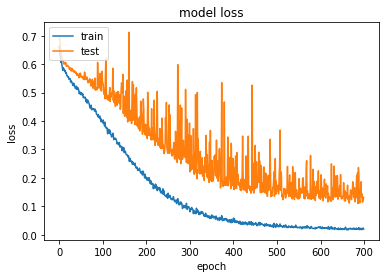

In [77]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [78]:
# Saving the model.json

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Load the model

In [79]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/aug_noiseNshift_2class2_np.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 97.08%


# Predicting emotions on the test data

In [80]:
len(data3_df)

80

In [81]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 80/80 [00:02<00:00, 27.86it/s]


In [82]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

80/80 [==============================] - 0s 3ms/step


In [83]:
preds

array([[4.3718383e-01, 5.6281620e-01],
       [6.8904996e-02, 9.3109500e-01],
       [8.3606881e-01, 1.6393115e-01],
       [9.8910987e-01, 1.0890101e-02],
       [5.2616134e-04, 9.9947387e-01],
       [9.6499892e-03, 9.9035001e-01],
       [5.3306246e-01, 4.6693751e-01],
       [5.1178747e-01, 4.8821256e-01],
       [1.6582424e-04, 9.9983418e-01],
       [2.3583379e-02, 9.7641659e-01],
       [9.0682936e-01, 9.3170606e-02],
       [7.9057902e-01, 2.0942101e-01],
       [7.2003603e-03, 9.9279964e-01],
       [3.7788174e-03, 9.9622118e-01],
       [9.8272461e-01, 1.7275354e-02],
       [1.5179635e-02, 9.8482031e-01],
       [1.7947496e-01, 8.2052499e-01],
       [9.8249048e-01, 1.7509473e-02],
       [3.0323151e-01, 6.9676846e-01],
       [1.0142946e-03, 9.9898571e-01],
       [7.3572546e-01, 2.6427454e-01],
       [3.8181250e-03, 9.9618185e-01],
       [6.3747513e-01, 3.6252487e-01],
       [4.0183517e-01, 5.9816486e-01],
       [1.4034365e-01, 8.5965633e-01],
       [5.3940510e-04, 9.

In [84]:
preds1=preds.argmax(axis=1)

In [85]:
preds1

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [86]:
abc = preds1.astype(int).flatten()

In [87]:
predictions = (lb.inverse_transform((abc)))

In [88]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_positive
1,male_positive
2,male_negative
3,male_negative
4,male_positive
5,male_positive
6,male_negative
7,male_negative
8,male_positive
9,male_positive


In [89]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [90]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_negative
1,male_negative
2,male_negative
3,male_negative
4,male_negative
5,male_negative
6,male_positive
7,male_positive
8,male_positive
9,male_positive


In [91]:
finaldf = actualdf.join(preddf)

# Actual vs Predict 

In [92]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
male_negative,48
male_positive,32


In [93]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_negative,45
male_positive,35


In [94]:
finaldf.to_csv('Predictions.csv', index=False)

In [95]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [96]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

58.75

In [97]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

57.631198844487244

In [98]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[30, 18],
       [15, 17]])

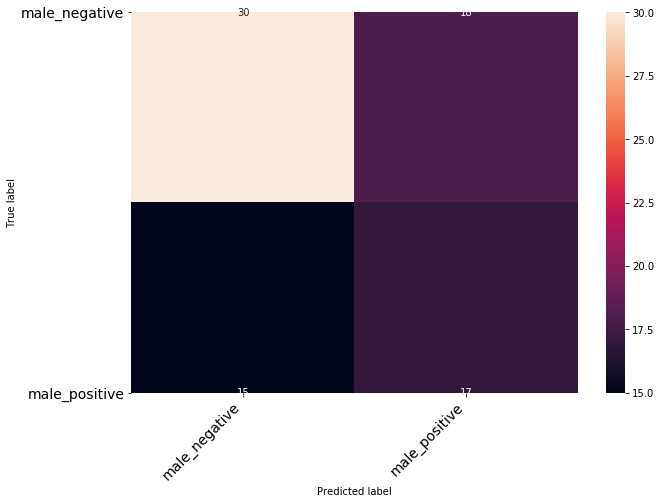

In [99]:
# Visualize Confusion Matrix 

# class_names = ['male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']
# class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad']
# class_names = ['male_negative', 'male_neutral', 'male_positive']
class_names = ['male_negative', 'male_positive']
# class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']


print_confusion_matrix(c, class_names)